In [1]:
using Flux
using Plots
actual(x) = exp(-x^2)
x_train, x_test = hcat(0:5...), hcat(6:10...)
y_train, y_test = actual.(x_train), actual.(x_test)

# introduce some noise in training data 
y_train = y_train + randn(size(y_train))


# define loss function 
using Statistics
loss(model, x, y) = mean(abs2.(model(x) .- y));

using Flux: train!
# Gradient Descent optimizer
opt = Descent()
data = [(x_train, y_train)]

1-element Vector{Tuple{Matrix{Int64}, Matrix{Float64}}}:
 ([0 1 … 4 5], [0.5109478161065216 0.4424440841332472 … 0.038359936243160135 -0.8760572038175497])

In [2]:
println("\n================ Q1: Linear Regression ================")
# two parameters basic linear regression 
predict = Dense(1 => 1)
println("Basic Linear regression ")
for epoch in 1:20
   train!(loss, predict, data, opt)
   @show loss(predict, x_train, y_train)
end
println("=== Basic Linear Regression complete ===")


================ Q1: Linear Regression ================
Basic Linear regression 
loss(predict, x_train, y_train) = 9.606059366646887
loss(predict, x_train, y_train) = 9.139650754559517
loss(predict, x_train, y_train) = 8.696981033250282
loss(predict, x_train, y_train) = 8.276842142445071
loss(predict, x_train, y_train) = 7.878086031087659
loss(predict, x_train, y_train) = 7.499622127299813
loss(predict, x_train, y_train) = 7.140418836092067
loss(predict, x_train, y_train) = 6.799493641662934
loss(predict, x_train, y_train) = 6.4759189269764725
loss(predict, x_train, y_train) = 6.168806618479047
loss(predict, x_train, y_train) = 5.8773206111406475
loss(predict, x_train, y_train) = 5.600665128464236
loss(predict, x_train, y_train) = 5.33808532313292
loss(predict, x_train, y_train) = 5.088865683952274
loss(predict, x_train, y_train) = 4.8523240804076595
loss(predict, x_train, y_train) = 4.6278171140267546
loss(predict, x_train, y_train) = 4.414733115661963
loss(predict, x_train, y_train)

┌ Warning: Layer with Float32 parameters got Float64 input.
│   The input will be converted, but any earlier layers may be very slow.
│   layer = Dense(1 => 1)       # 2 parameters
│   summary(x) = "1×101 Matrix{Float64}"
└ @ Flux ~/.julia/packages/Flux/DZYiO/src/layers/stateless.jl:60


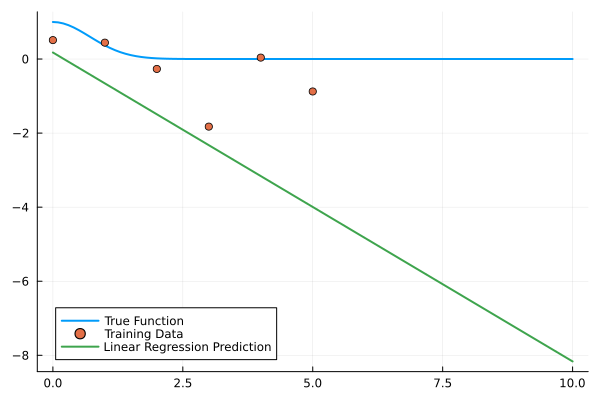

reset the data


1-element Vector{Tuple{Matrix{Int64}, Matrix{Float64}}}:
 ([0 1 … 4 5], [0.5109478161065216 0.4424440841332472 … 0.038359936243160135 -0.8760572038175497])

In [3]:
# Plot for Q1
x_plot = collect(0:0.1:10)
y_true = actual.(x_plot)
y_pred_lr = predict(hcat(x_plot...))

p = plot(x_plot, y_true, label="True Function", lw=2)
scatter!(p, vec(x_train), vec(y_train), label="Training Data")
plot!(p, x_plot, vec(y_pred_lr), label="Linear Regression Prediction", lw=2)
savefig(p, "Q1_linear_regression.png")
display(p)
println("reset the data")
data = [(x_train, y_train)]


================ Q2: Feedforward Neural Network ================
Activation function : relu (multiple configurations)

Training model with 10 hidden neurons
Final training loss: 0.4421548936550525


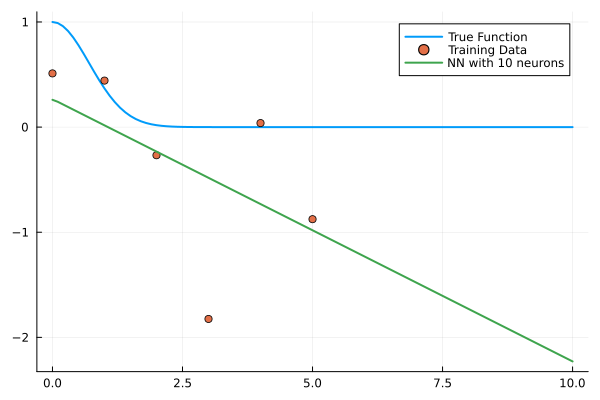


Training model with 20 hidden neurons
Final training loss: 0.44605410737433093


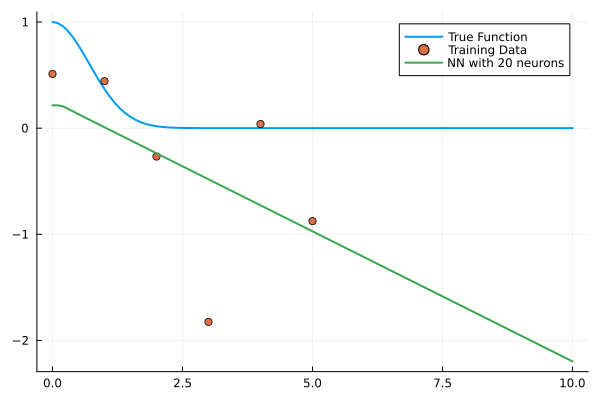


Training model with 50 hidden neurons
Final training loss: 0.46662852229560664


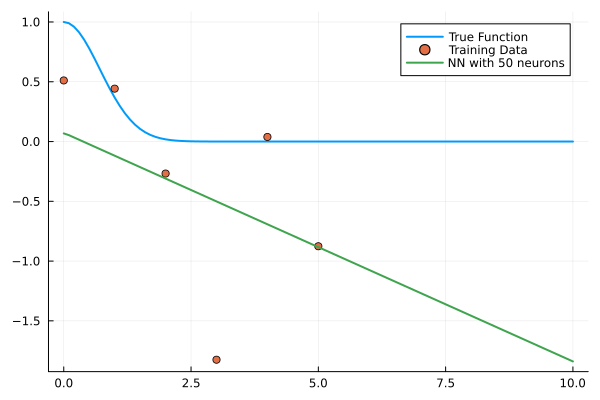

complete , resetting the data


In [4]:
println("\n================ Q2: Feedforward Neural Network ================")
# activation function relu - trying multiple configurations
println("Activation function : relu (multiple configurations)")

configs = [10, 20, 50]  # different hidden layer sizes

for n_hidden in configs
    println("\nTraining model with ", n_hidden, " hidden neurons")
    
    model_relu = Chain(
        Dense(1 => n_hidden, relu),
        Dense(n_hidden => 1)
    )
    
    opt_relu = Descent()  # fresh optimizer for each model
    
    for epoch in 1:20
        train!(loss, model_relu, data, opt_relu)
    end
    
    println("Final training loss: ", loss(model_relu, x_train, y_train))
    y_pred_nn = model_relu(hcat(x_plot...))
    p = plot(x_plot, y_true, label="True Function", lw=2)
    scatter!(p, vec(x_train), vec(y_train), label="Training Data")
    plot!(p, x_plot, vec(y_pred_nn), label="NN with $(n_hidden) neurons", lw=2)
    savefig(p, "Q2_nn_$(n_hidden).png")
    display(p)
end

println("complete , resetting the data")


================ Q3: Recurrent Neural Network ================
Recurrent Neural Network (RNN) configurations

Training RNN with 5 hidden units
Final training loss: 0.30381808182218334


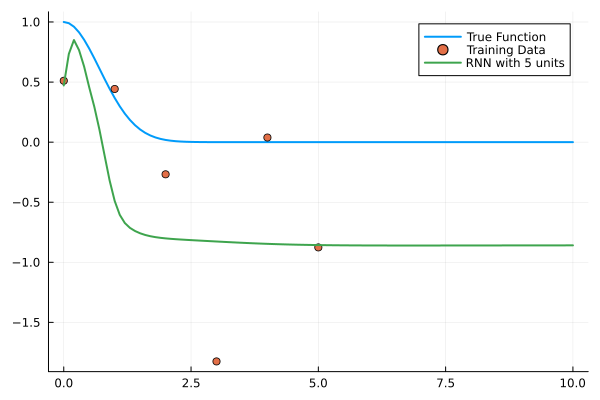


Training RNN with 10 hidden units
Final training loss: 0.22205627123313754


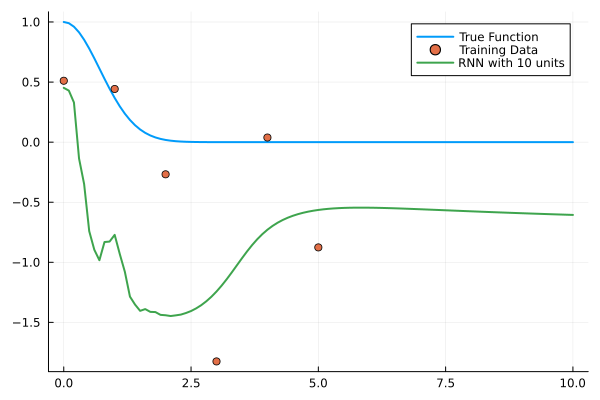


Training RNN with 20 hidden units
Final training loss: 0.0019999663879724868


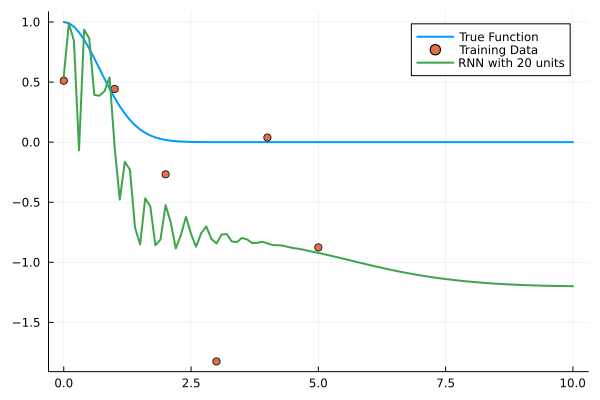

RNN experiments complete


1-element Vector{Tuple{Matrix{Int64}, Matrix{Float64}}}:
 ([0 1 … 4 5], [0.5109478161065216 0.4424440841332472 … 0.038359936243160135 -0.8760572038175497])

In [5]:
println("\n================ Q3: Recurrent Neural Network ================")
# Recurrent Neural Network experiments
println("Recurrent Neural Network (RNN) configurations")

rnn_configs = [5, 10, 20]  # number of hidden units

# reshape data for RNN: (features, sequence_length, batch_size)
x_train_rnn = reshape(x_train, 1, :, 1)
y_train_rnn = reshape(y_train, 1, :, 1)

for hidden_size in rnn_configs
    println("\nTraining RNN with ", hidden_size, " hidden units")
    
    model_rnn = Chain(
        RNN(1 => hidden_size, tanh),
        Dense(hidden_size => 1)
    )
    
    opt_rnn = Descent()
    
    for epoch in 1:30
        Flux.reset!(model_rnn)
        train!( (m, x, y) -> mean(abs2.(m(x) .- y)), model_rnn, [(x_train_rnn, y_train_rnn)], opt_rnn)
    end
    
    Flux.reset!(model_rnn)
    final_loss = mean(abs2.(model_rnn(x_train_rnn) .- y_train_rnn))
    println("Final training loss: ", final_loss)
    Flux.reset!(model_rnn)
    x_plot_rnn = reshape(hcat(x_plot...), 1, :, 1)
    y_pred_rnn = model_rnn(x_plot_rnn)

    p = plot(x_plot, y_true, label="True Function", lw=2)
    scatter!(p, vec(x_train), vec(y_train), label="Training Data")
    plot!(p, x_plot, vec(y_pred_rnn), label="RNN with $(hidden_size) units", lw=2)
    savefig(p, "Q3_rnn_$(hidden_size).png")
    display(p)
end

println("RNN experiments complete")

data = [(x_train, y_train)]